## 1 导入包

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston


## 2 加载数据集

In [2]:
boston = load_boston()
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X_raw = boston.data
y = boston.target

In [4]:
boston = pd.DataFrame(boston.data, columns=boston.feature_names)
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.describe()  # 数据描述，可以查看每个每个变量的统计量


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 3 数据预处理

归一化或者标准化首先在维数非常多的时候，可以防止某一维或某几维对数据影响过大，其次可以程序可以运行更快。方法很多，标准化，min-max,z-score,p范数等，具体怎么使用，要根据数据集的特征来选择。

[延伸阅读-数据标准化的迷思之深度学习领域](https://zhuanlan.zhihu.com/p/81560511)

In [6]:
def standardize(x):
    mu = np.mean(x,axis=0)
    sigma = np.std(x, axis=0)
    return (x - mu) / sigma


X = standardize(X_raw)
X = pd.DataFrame(X, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
X.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


$$
\boldsymbol{\theta}=\left[\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\vdots \\
\theta_{n}
\end{array}\right] \quad \boldsymbol{x}=\left[\begin{array}{c}
1 \\
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{array}\right]
$$

In [7]:
# θ和x的维度不同，处理起来会很麻烦。手动给X添加一个X0列，其值全部为1
X['X0'] = 1
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,X0
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,1
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,1
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,1
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,1


划分数据集，其中20%的数据用作测试集X_test,y_test,另外80%的数据用做训练集X_train,y_train，其中random_state为随机种子

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [9]:
print("X_train.shape,y_train.shape", X_train.shape, y_train.shape)  # 打印数据条数
print("X_test.shape,y_test.shape", X_test.shape, y_test.shape)


X_train.shape,y_train.shape (404, 14) (404,)
X_test.shape,y_test.shape (102, 14) (102,)


In [10]:
X_train = np.array(X_train)


## 4 模型训练与梯度更新

$$
f_{\theta}(x) =\theta ^ {\mathrm{T}} x=\theta_{0} x_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\cdots+\theta_{n} x_{n}
$$


In [11]:
def f(theta,X):
    return theta.dot(X.T)
def MSE(X, y, theta):
    return np.sum((y-f(theta, X))**2)/X.shape[0]

$$
\theta_{j} :=\theta_{j} -\eta \sum_{i = 1} ^ {n}\left(f_{\theta}\left(\boldsymbol{x} ^ {(i)}\right)-y ^ {(i)}\right) x_{j} ^ {(i)}
$$


In [12]:
def step_gradient(X, y, learning_rate, theta):
    theta = theta - learning_rate * np.dot(f(theta, X) - y, X)
    # k = X.shape[0]
    # n = X.shape[1]
    # gradients = np.zeros(n)
    # for i in range(k):
    #     for j in range(n):
    #         gradients[j] += (-2/k) * ( y[i] - (theta.dot(X[i,:])) ) * X[i,j]
    # theta = theta - learning_rate * gradients
    return theta


In [13]:
theta = np.random.rand(X_train.shape[1])
1e-3*np.dot(f(theta, X_train) - y_train, X_train)


array([ 1.97557934, -1.40726297,  2.52994727, -0.72918337,  1.97810226,
       -3.34798081,  1.68727849, -1.33420048,  2.2278111 ,  2.55123458,
        2.8456057 , -1.48977763,  3.44588791, -9.1668917 ])

In [14]:
theta = np.random.rand(X_train.shape[1])
errors = []

theta=theta - 1e-3 * np.dot(f(theta, X_train) - y_train, X_train)
error = MSE(X_train, y_train, theta)
errors.append(error)
theta = theta - 1e-3 * np.dot(f(theta, X_train) - y_train, X_train)
error = MSE(X_train, y_train, theta)
errors.append(error)
theta = theta - 1e-3 * np.dot(f(theta, X_train) - y_train, X_train)
error = MSE(X_train, y_train, theta)
errors.append(error)
errors


[317.8632292614914, 341.3933482017941, 587.0792727148645]

In [15]:
def gradient_descent(X_train, y_train, learning_rate, epochs):
    k = X_train.shape[0]
    n = X_train.shape[1]
    theta = np.random.rand(n)  # 初始化参数
    print(theta)
    loss_values = []
#     print(theta.shape)
    for i in range(epochs):
        theta = step_gradient(X_train, y_train, learning_rate, theta)
        loss = MSE(X_train, y_train, theta)
        loss_values.append(loss)
        print("Epoch:",i, 'loss:', loss)
    return theta, loss_values

In [16]:
# 训练参数
learning_rate = 1e-4  # 学习率
epochs = 300  # 迭代次数
theta, loss_values = gradient_descent(
    X_train, y_train, learning_rate, epochs)


[0.24205226 0.07645634 0.2095659  0.1493028  0.96881296 0.81947608
 0.67630247 0.53406304 0.56884798 0.399655   0.60547428 0.75471937
 0.54343206 0.00283336]
Epoch: 0 loss: 557.3306771518276
Epoch: 1 loss: 500.43639290149406
Epoch: 2 loss: 453.8658605901535
Epoch: 3 loss: 414.36572915057377
Epoch: 4 loss: 379.97958098303604
Epoch: 5 loss: 349.4992868926533
Epoch: 6 loss: 322.1514480098997
Epoch: 7 loss: 297.4179178859428
Epoch: 8 loss: 274.93282211520415
Epoch: 9 loss: 254.42324586686732
Epoch: 10 loss: 235.6748699030163
Epoch: 11 loss: 218.51187925150282
Epoch: 12 loss: 202.78505419488152
Epoch: 13 loss: 188.36456751842906
Epoch: 14 loss: 175.13550257786042
Epoch: 15 loss: 162.9949568178108
Epoch: 16 loss: 151.8500802823781
Epoch: 17 loss: 141.6166753869865
Epoch: 18 loss: 132.21814224958732
Epoch: 19 loss: 123.58464421858116
Epoch: 20 loss: 115.65241996406581
Epoch: 21 loss: 108.363198196351
Epoch: 22 loss: 101.6636881933839
Epoch: 23 loss: 95.50512924689328
Epoch: 24 loss: 89.842887

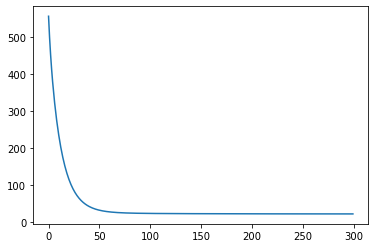

In [17]:
import matplotlib.pyplot as plt
x=np.arange(epochs)
plt.plot(x, loss_values)
plt.show()


loss 21.82358506709796


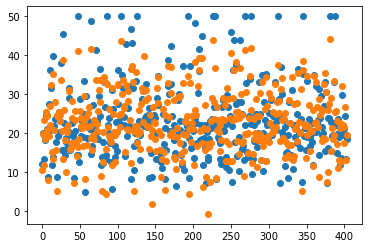

In [18]:
# 训练集的情况
y_train_predict = f(theta, X_train)
y_train_x = np.arange(y_train.size)
plt.scatter(y_train_x, y_train)
plt.scatter(y_train_x, y_train_predict)
plt.show
print("loss", MSE(X_train, y_train, theta))


loss 25.243350123500186


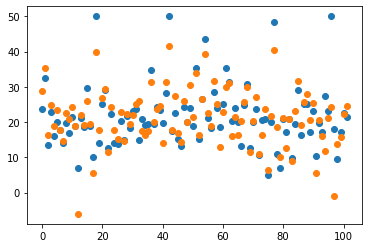

In [19]:
# 测试集的情况
y_test_predict = f(theta, X_test)
y_test_x = np.arange(y_test.size)
plt.scatter(y_test_x, y_test)
plt.scatter(y_test_x, y_test_predict)
plt.show
print("loss", MSE(X_test, y_test, theta))

## 使用mini-batch 随机梯度下降方法

In [40]:
import math
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    '''
    输入：X的维度是（n,m），n是样本数，m是每个样本的特征数
    '''
    np.random.seed(seed)
    n = X.shape[0]
    mini_batches = []
    #step1：打乱训练集
    #生成0~m-1随机顺序的值，作为我们的下标
    permutation = list(np.random.permutation(n))
    #得到打乱后的训练集
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation]
    #step2：按照batchsize分割训练集
    #得到总的子集数目，math.floor表示向下取整
    num_complete_minibatches = math.floor(n / mini_batch_size)
    for k in range(0, num_complete_minibatches):
        #冒号：表示取所有行，第二个参数a：b表示取第a列到b-1列，不包括b
        mini_batch_X = shuffled_X[k *
                                  mini_batch_size:(k+1) * mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size:(k+1) * mini_batch_size]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    #m%mini_batch_size != 0表示还有剩余的不够一个batch大小，把剩下的作为一个batch
    if n % mini_batch_size != 0:
        mini_batch_X = shuffled_X[mini_batch_size *
                                  num_complete_minibatches:, :]
        mini_batch_Y = shuffled_Y[mini_batch_size * num_complete_minibatches:]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


def mini_batch_gradient_descent(X_train, y_train, learning_rate, epochs, mini_batch_size=32, seed=0, eplison=1e-2):
    k = X_train.shape[0]
    n = X_train.shape[1]
    theta = np.random.rand(n)  # 初始化参数
    print(theta)
    loss_values = []
    loss = MSE(X_train, y_train, theta)
    loss_values.append(loss)
#     print(theta.shape)
    for i in range(epochs):
        minibatches = random_mini_batches(
            X_train, y_train, mini_batch_size, seed)
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            theta = step_gradient(
                minibatch_X, minibatch_Y, learning_rate, theta)
        loss = MSE(X_train, y_train, theta)
        loss_values.append(loss)
        print("Epoch:", i, 'loss:', loss)
        diff=abs(loss_values[-2]-loss_values[-1])
        if diff < eplison:
            break
        seed = seed + 1
    return theta, loss_values


In [53]:
seed = 0
max_epoch = 700
eplison = 1e-3
mini_batch_size = 50
learning_rate = 1e-4  # 学习率

theta, loss_values = mini_batch_gradient_descent(
    X_train, y_train, learning_rate, max_epoch, mini_batch_size, seed, eplison)


[0.6362347  0.7713328  0.43596479 0.2627985  0.86665446 0.96317317
 0.19234044 0.69057477 0.07058221 0.11644892 0.74402719 0.60998175
 0.75489142 0.22650727]
Epoch: 0 loss: 546.97935259135
Epoch: 1 loss: 494.96439032581685
Epoch: 2 loss: 450.98122172156286
Epoch: 3 loss: 412.865596257163
Epoch: 4 loss: 379.4820219380075
Epoch: 5 loss: 349.51731626648814
Epoch: 6 loss: 322.58578783514685
Epoch: 7 loss: 298.1267656468542
Epoch: 8 loss: 275.88749810875214
Epoch: 9 loss: 255.60330782342146
Epoch: 10 loss: 237.06541007792353
Epoch: 11 loss: 220.0386742449074
Epoch: 12 loss: 204.4464088395888
Epoch: 13 loss: 190.12837340803557
Epoch: 14 loss: 176.97885396203577
Epoch: 15 loss: 164.89856505006983
Epoch: 16 loss: 153.79334449647092
Epoch: 17 loss: 143.58739799091904
Epoch: 18 loss: 134.20108414331148
Epoch: 19 loss: 125.57035700025214
Epoch: 20 loss: 117.61868003797652
Epoch: 21 loss: 110.30187487037493
Epoch: 22 loss: 103.57454555867902
Epoch: 23 loss: 97.37916094833587
Epoch: 24 loss: 91.678

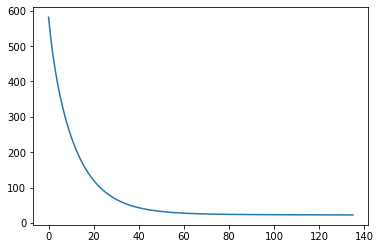

In [50]:
plt.plot(loss_values)
plt.show()
